In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("Crop Production data.csv")


In [3]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
data.shape

(246091, 7)

In [16]:

data['Crop'].unique()



array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

### Top 5 Crops and Others


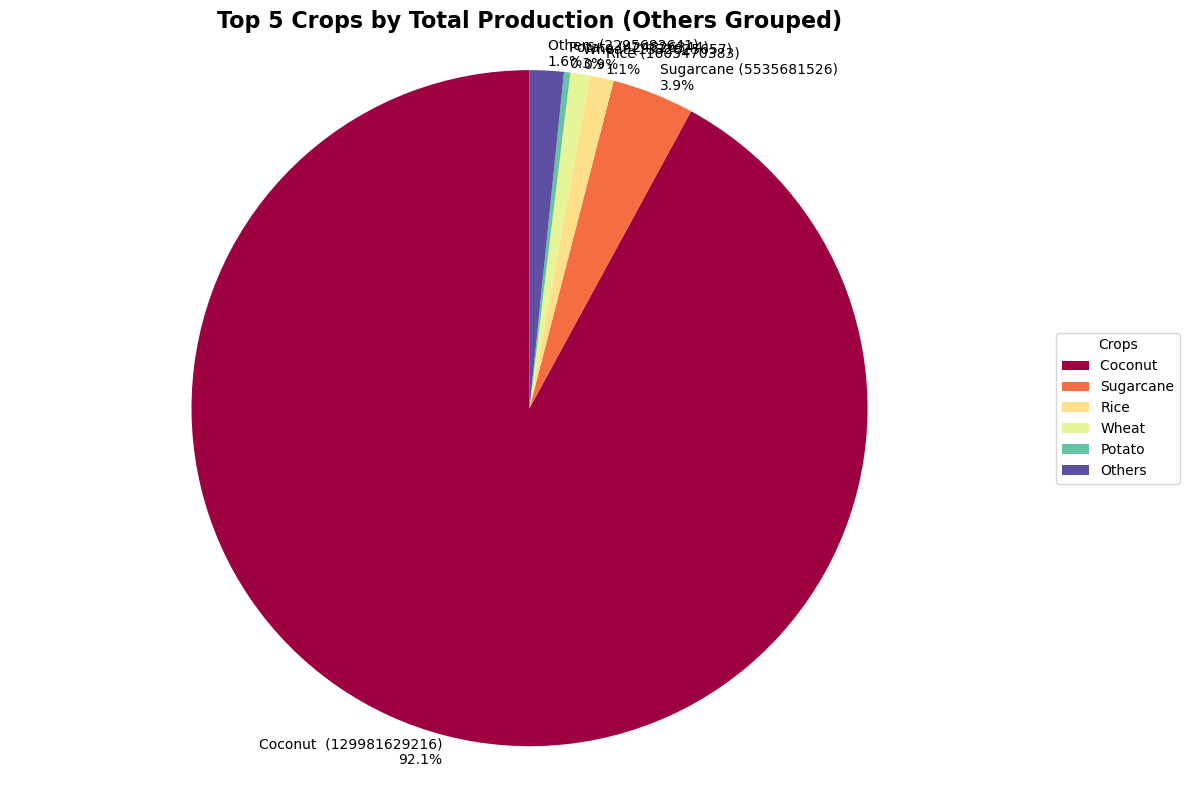

In [11]:
crop_production = data.groupby('Crop')['Production'].sum().sort_values(ascending=False)
top_5_crops = crop_production.head(5)
others = pd.Series({'Others': crop_production[5:].sum()})
pie_data = pd.concat([top_5_crops, others])
total = pie_data.sum()
percentages = pie_data / total * 100

labels = [f'{index} ({value:.0f})\n{percentage:.1f}%' 
          for index, value, percentage in zip(pie_data.index, pie_data.values, percentages)]

colors = plt.cm.Spectral(np.linspace(0, 1, len(pie_data)))

plt.figure(figsize=(12, 8))
wedges, texts = plt.pie(pie_data.values, labels=labels, colors=colors,
                        startangle=90, labeldistance=1.05)

plt.legend(wedges, pie_data.index,
           title="Crops",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Top 5 Crops by Total Production (Others Grouped)', size=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### The number of Coconut production is very high.


### Coconut production in each state


Coconut production by state:
State_Name
Kerala                         9.780304e+10
Andhra Pradesh                 1.680600e+10
Tamil Nadu                     1.093774e+10
Assam                          1.954408e+09
West Bengal                    7.178412e+08
Andaman and Nicobar Islands    7.177900e+08
Goa                            5.031126e+08
Puducherry                     3.791390e+08
Telangana                      1.056730e+08
Karnataka                      5.676710e+07
Dadra and Nagar Haveli         1.172880e+05
Mizoram                        4.000000e+01
Chhattisgarh                   0.000000e+00
Name: Production, dtype: float64


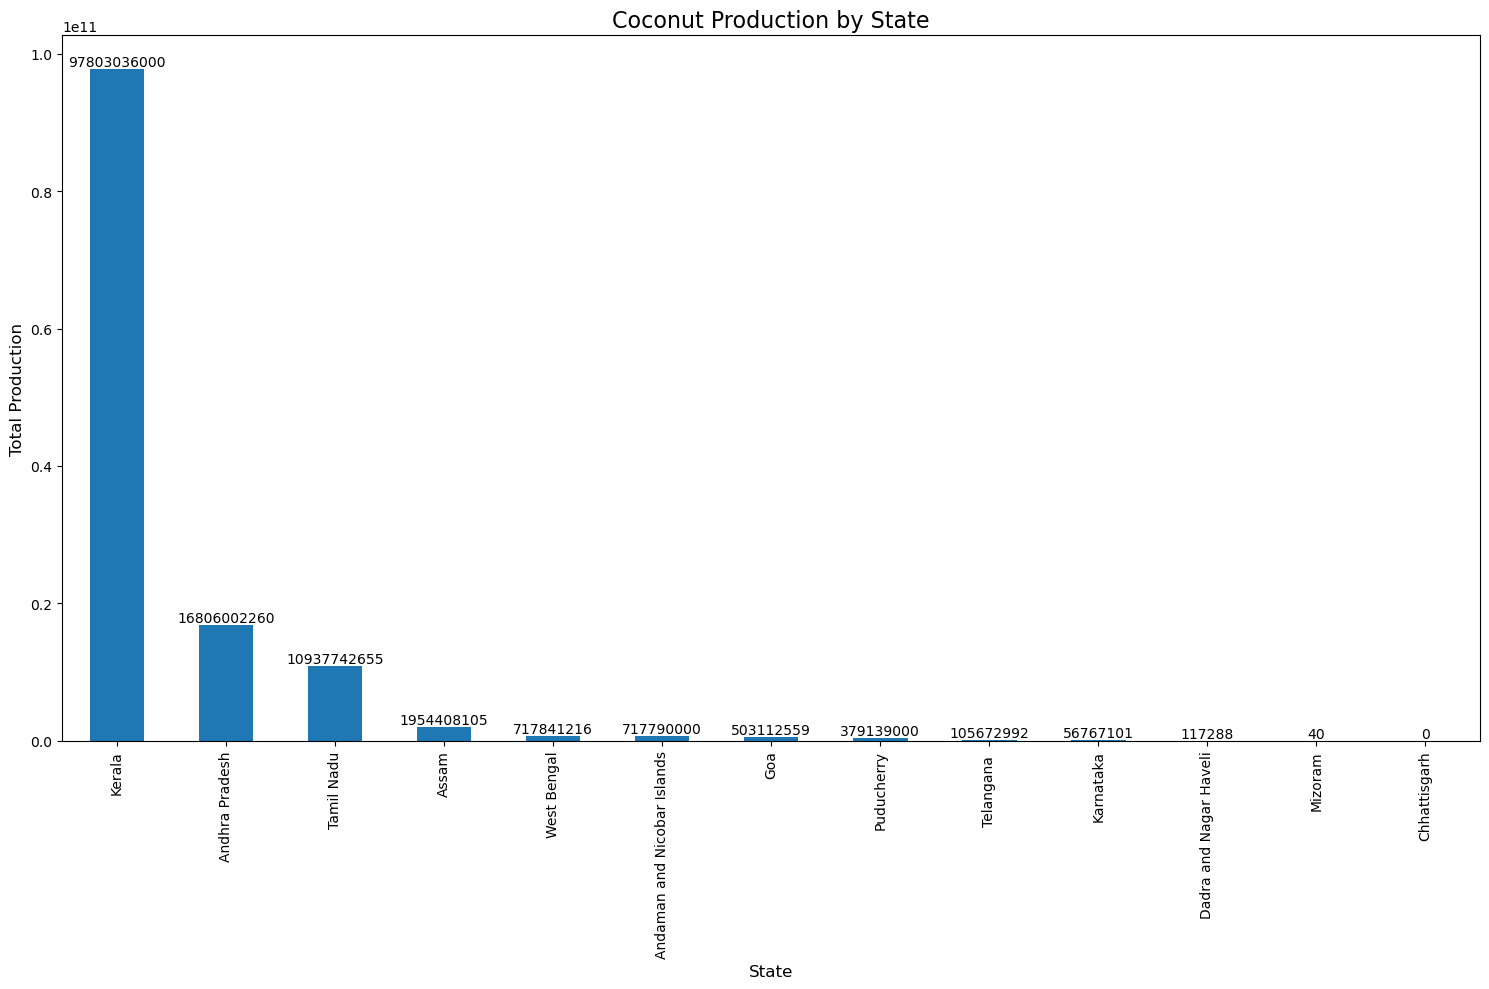

In [18]:
coconut_data = data[data['Crop'] == 'Coconut ']
coconut_by_state = coconut_data.groupby('State_Name')['Production'].sum().sort_values(ascending=False)
print("Coconut production by state:")
print(coconut_by_state)
plt.figure(figsize=(15, 10))
coconut_by_state.plot(kind='bar')   
plt.title('Coconut Production by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

for i, v in enumerate(coconut_by_state.values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')
plt.show()


### Total Production over the years


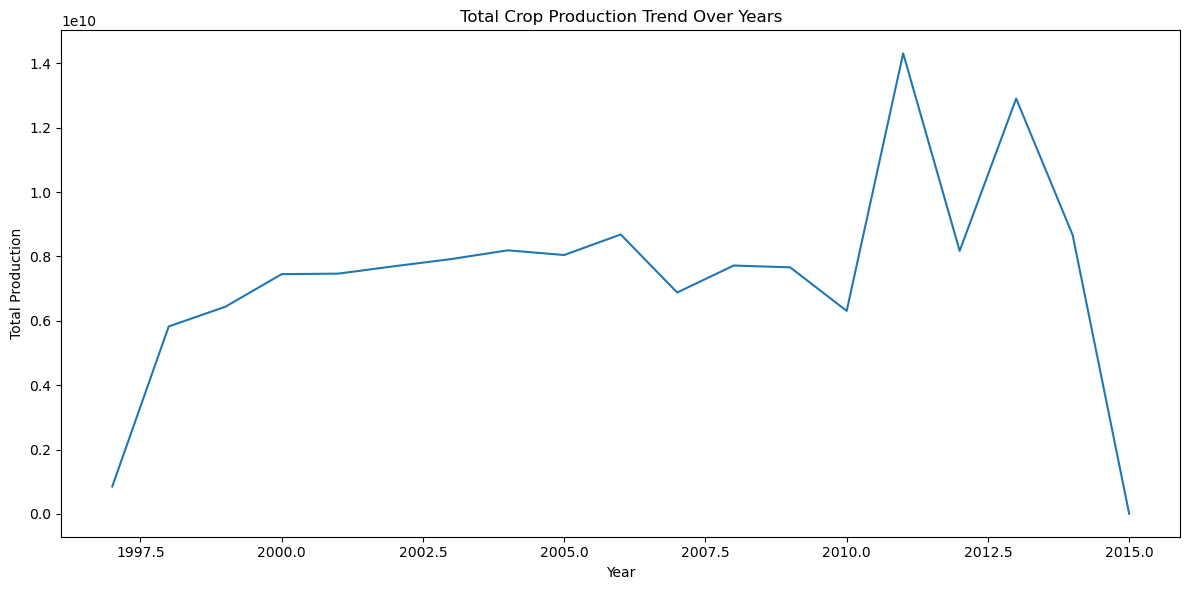

In [19]:
yearly_production = data.groupby('Crop_Year')['Production'].sum()
plt.figure(figsize=(12, 6))
plt.plot(yearly_production.index, yearly_production.values)
plt.title('Total Crop Production Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.tight_layout()
plt.show()

### Seasonal Distribution of Crop Production



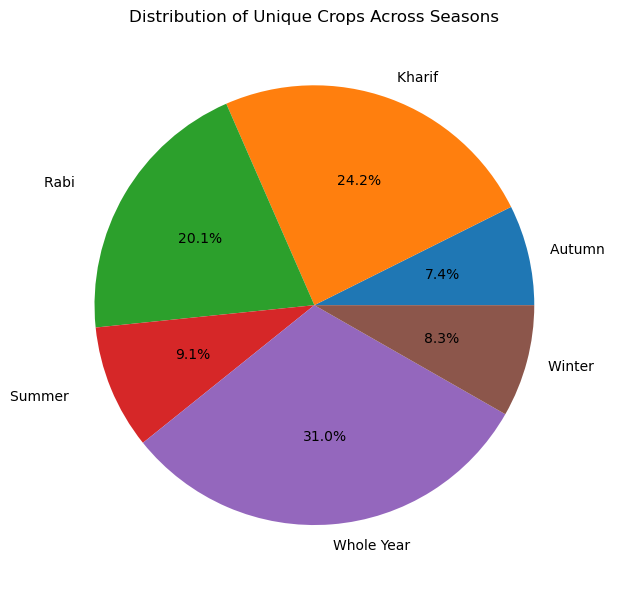

In [20]:
season_crop_count = data.groupby('Season')['Crop'].nunique()
plt.figure(figsize=(10, 6))
season_crop_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Unique Crops Across Seasons')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Top 5 States by Total Production


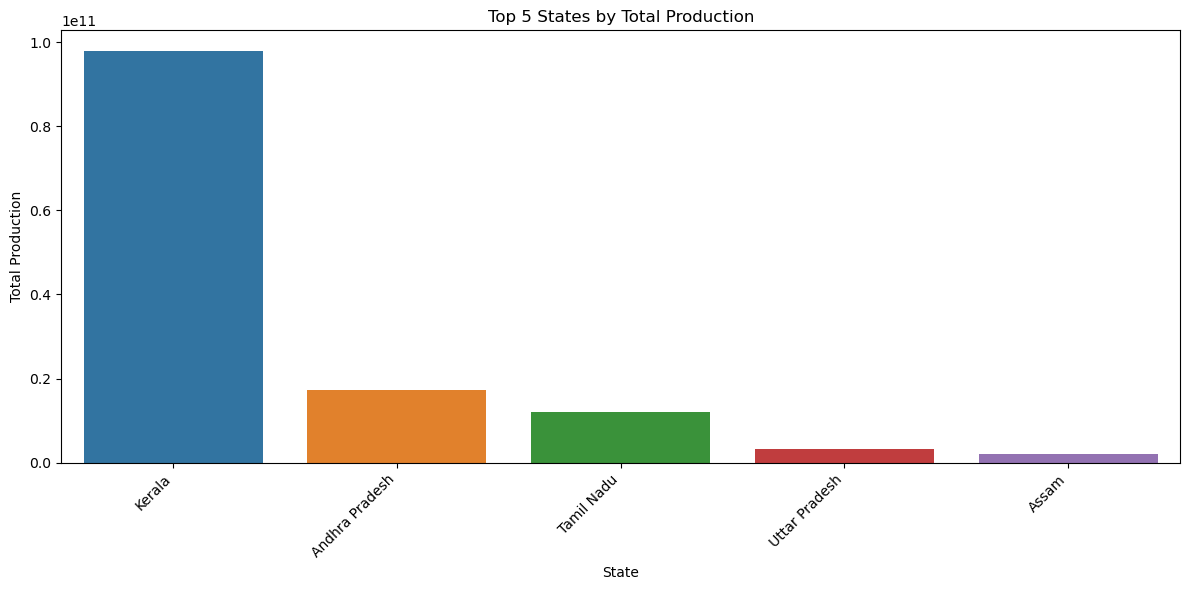

In [22]:
top_states = data.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 5 States by Total Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Total Production vs Total Area by State


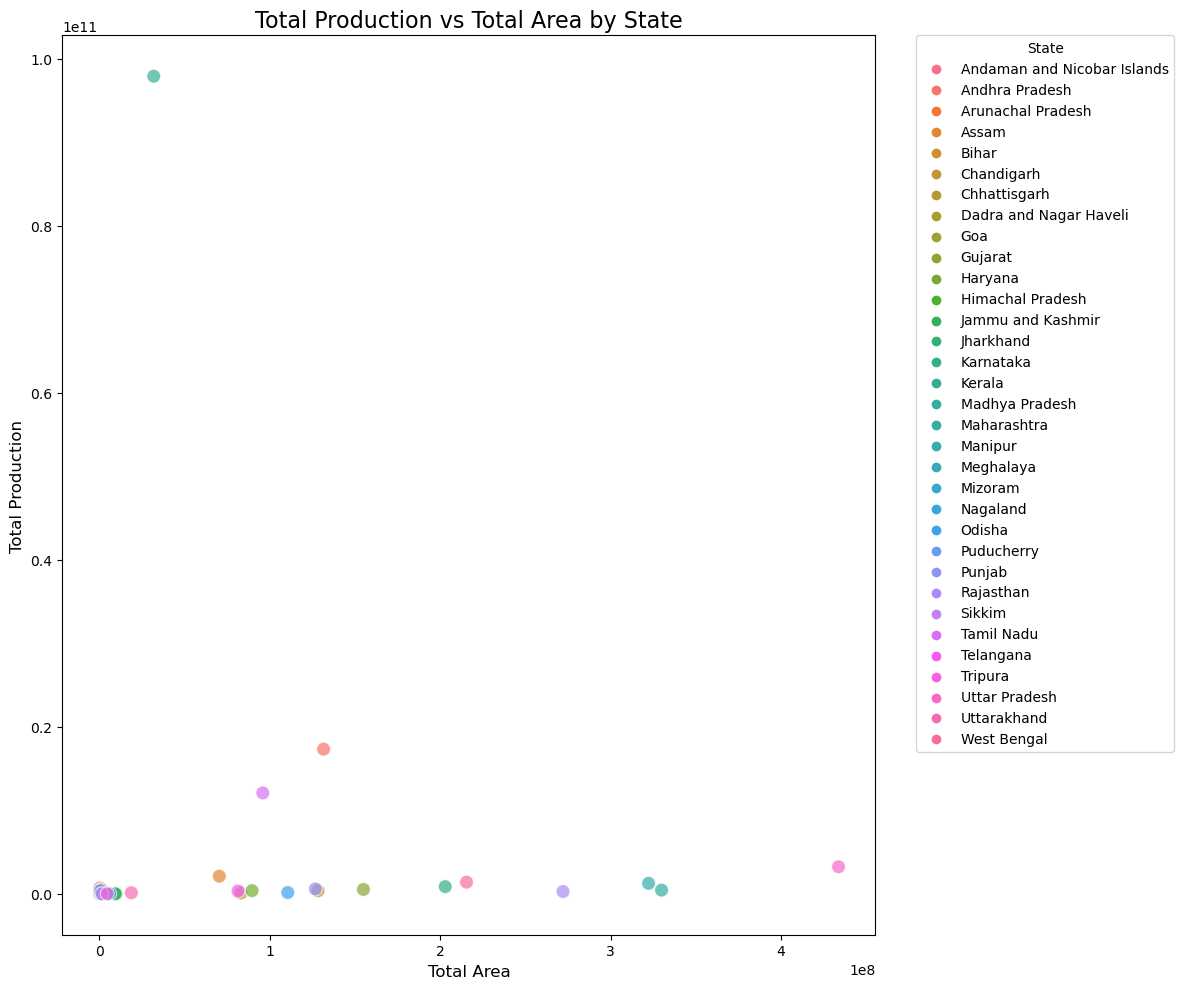

In [27]:
state_data = data.groupby('State_Name').agg({
    'Area': 'sum',
    'Production': 'sum'
}).reset_index()

plt.figure(figsize=(12, 10))
sns.scatterplot(data=state_data, x='Area', y='Production', hue='State_Name', s=100, alpha=0.7)
plt.title('Total Production vs Total Area by State', fontsize=16)
plt.xlabel('Total Area', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

### Total Cultivated Area Over the Years


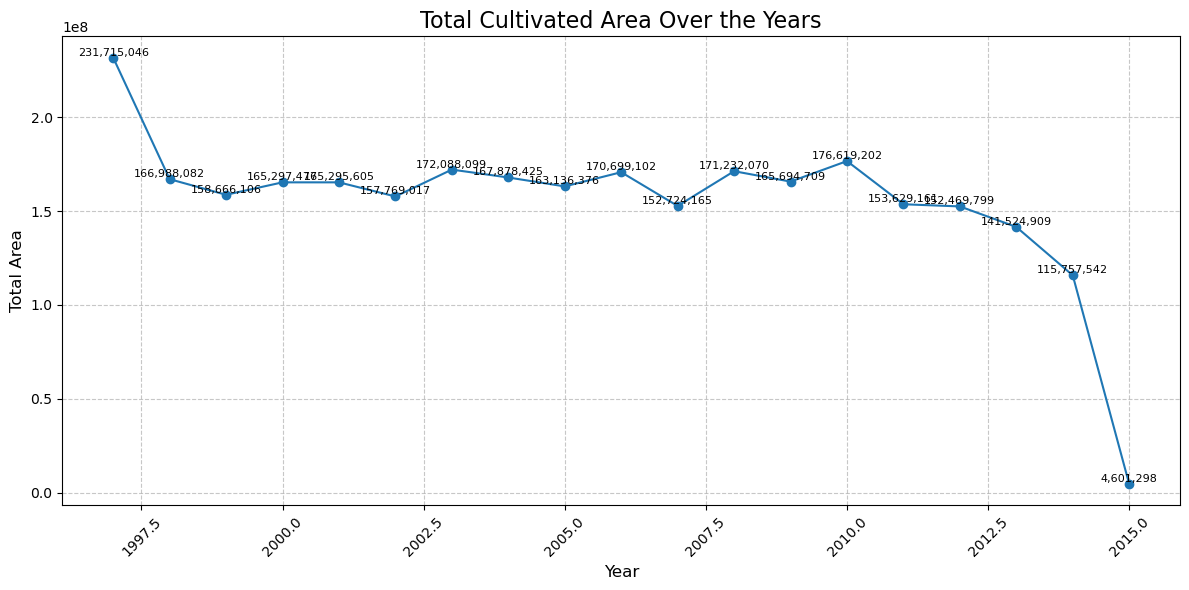

         Crop_Year          Area
count    19.000000  1.900000e+01
mean   2006.000000  1.554624e+08
std       5.627314  4.231400e+07
min    1997.000000  4.601298e+06
25%    2001.500000  1.531767e+08
50%    2006.000000  1.652956e+08
75%    2010.500000  1.692888e+08
max    2015.000000  2.317150e+08

Overall change from 1997 to 2015:
Absolute change: -227,113,748
Percentage change: -98.01%


In [31]:
yearly_area = data.groupby('Crop_Year')['Area'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_area['Crop_Year'], yearly_area['Area'], marker='o')
plt.title('Total Cultivated Area Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Area', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in yearly_area.iterrows():
    plt.text(v['Crop_Year'], v['Area'], f'{v["Area"]:,.0f}', 
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()
print(yearly_area.describe())
start_area = yearly_area.iloc[0]['Area']
end_area = yearly_area.iloc[-1]['Area']
percent_change = ((end_area - start_area) / start_area) * 100

print(f"\nOverall change from {yearly_area['Crop_Year'].min()} to {yearly_area['Crop_Year'].max()}:")
print(f"Absolute change: {end_area - start_area:,.0f}")
print(f"Percentage change: {percent_change:.2f}%")

### Coconut Production Over the Years


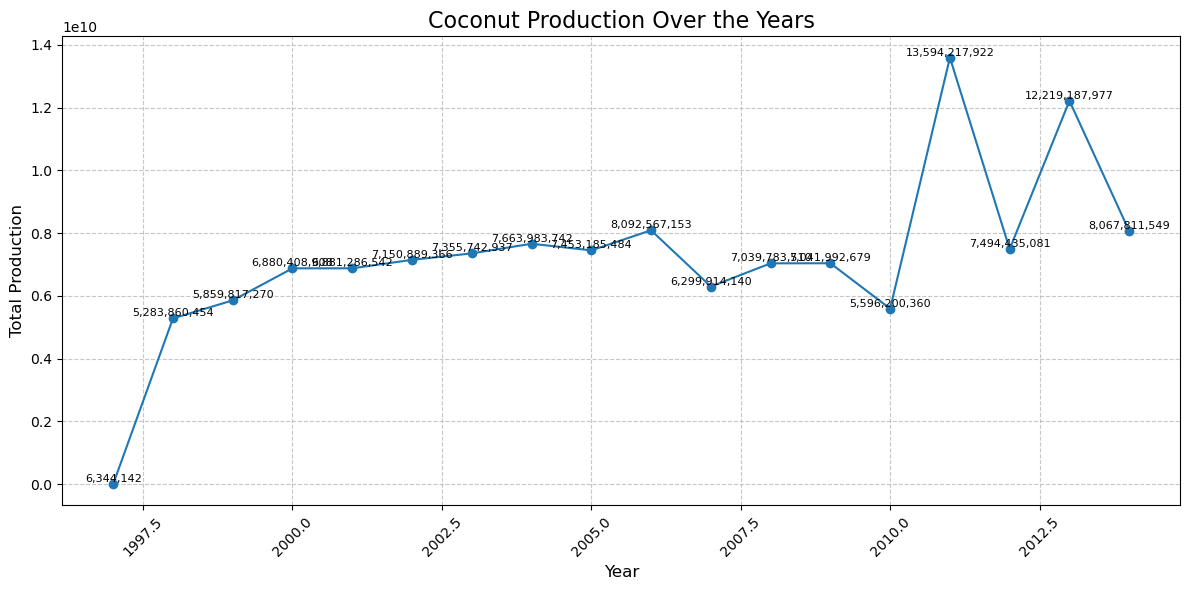

         Crop_Year    Production
count    18.000000  1.800000e+01
mean   2005.500000  7.221202e+09
std       5.338539  2.753241e+09
min    1997.000000  6.344142e+06
25%    2001.250000  6.445038e+09
50%    2005.500000  7.096441e+09
75%    2009.750000  7.621597e+09
max    2014.000000  1.359422e+10

Overall change from 1997 to 2014:
Absolute change: 8,061,467,407
Percentage change: 127069.47%


In [33]:
coconut_data = data[data['Crop'] == 'Coconut ']
yearly_coconut = coconut_data.groupby('Crop_Year')['Production'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_coconut['Crop_Year'], yearly_coconut['Production'], marker='o')
plt.title('Coconut Production Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in yearly_coconut.iterrows():
    plt.text(v['Crop_Year'], v['Production'], f'{v["Production"]:,.0f}', 
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()
print(yearly_coconut.describe())
start_production = yearly_coconut.iloc[0]['Production']
end_production = yearly_coconut.iloc[-1]['Production']
percent_change = ((end_production - start_production) / start_production) * 100

print(f"\nOverall change from {yearly_coconut['Crop_Year'].min()} to {yearly_coconut['Crop_Year'].max()}:")
print(f"Absolute change: {end_production - start_production:,.0f}")
print(f"Percentage change: {percent_change:.2f}%")

### Coconut Production and Area Over the Years


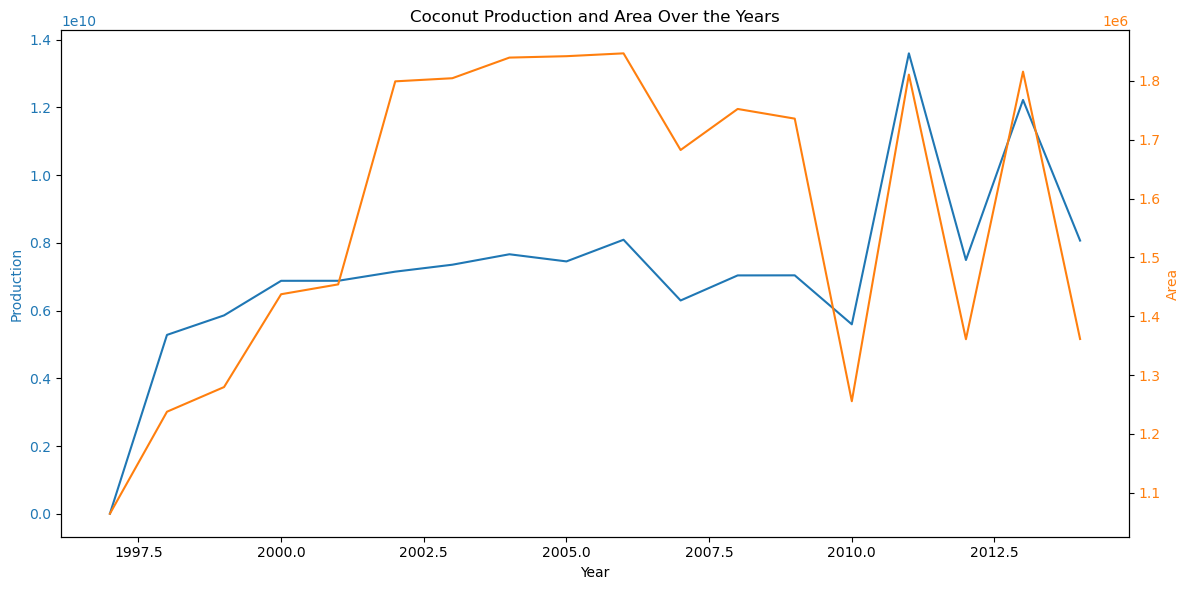

In [52]:
yearly_coconut_area = coconut_data.groupby('Crop_Year')['Area'].sum().reset_index()
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Production', color='tab:blue')
ax1.plot(yearly_coconut['Crop_Year'], yearly_coconut['Production'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Area', color='tab:orange')  
ax2.plot(yearly_coconut_area['Crop_Year'], yearly_coconut_area['Area'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
plt.title('Coconut Production and Area Over the Years')
fig.tight_layout()
plt.show()

### Production Trends of Top 5 Crops Over the Years


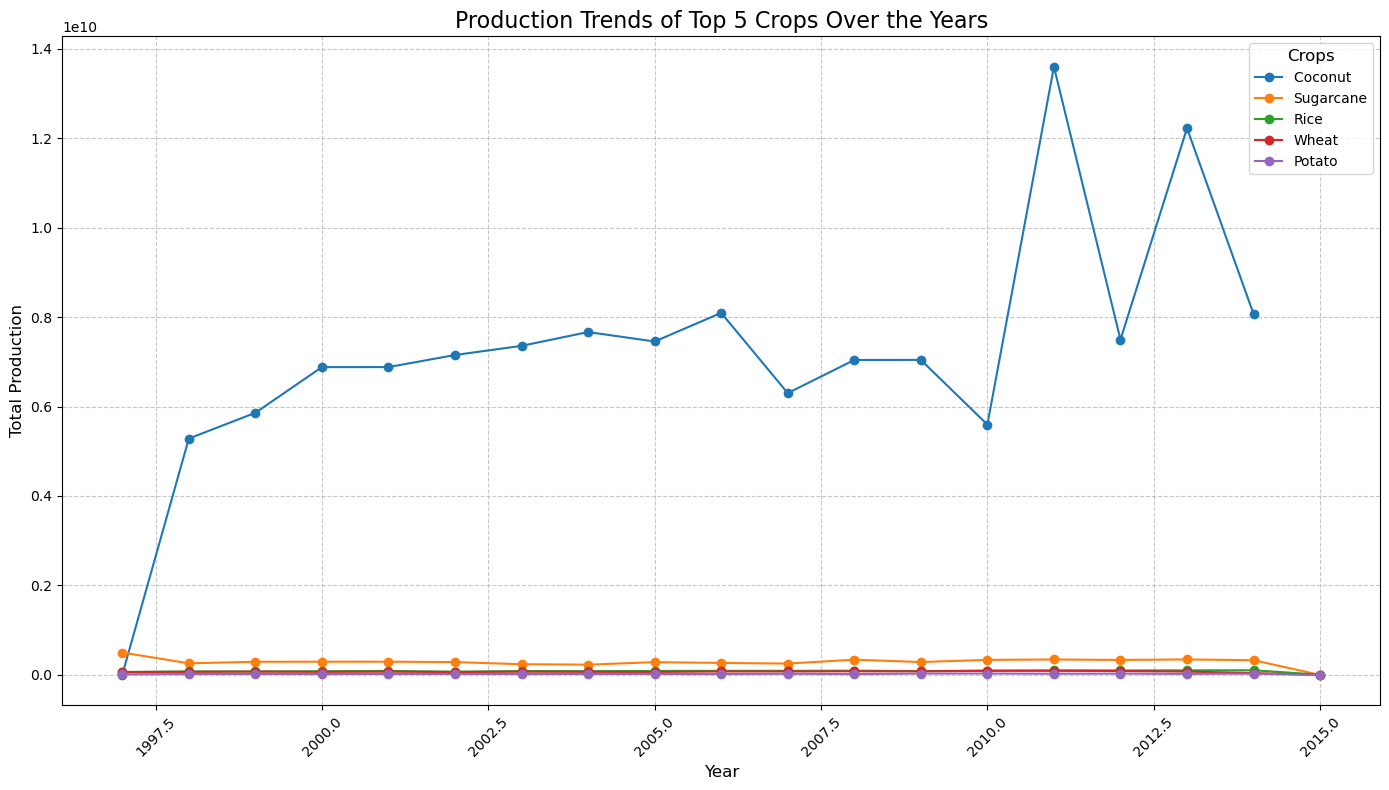

In [36]:
top_5_crops = data.groupby('Crop')['Production'].sum().nlargest(5).index.tolist()
top_5_data = data[data['Crop'].isin(top_5_crops)]
yearly_top_5 = top_5_data.groupby(['Crop', 'Crop_Year'])['Production'].sum().reset_index()
yearly_top_5_pivot = yearly_top_5.pivot(index='Crop_Year', columns='Crop', values='Production')
plt.figure(figsize=(14, 8))
for crop in top_5_crops:
    plt.plot(yearly_top_5_pivot.index, yearly_top_5_pivot[crop], marker='o', label=crop)
plt.title('Production Trends of Top 5 Crops Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.legend(title='Crops', title_fontsize='12', fontsize='10')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
for crop in top_5_crops:
    start_production = yearly_top_5_pivot[crop].iloc[0]
    end_production = yearly_top_5_pivot[crop].iloc[-1]
    percent_change = ((end_production - start_production) / start_production) * 100

### Area vs Production for All Crops


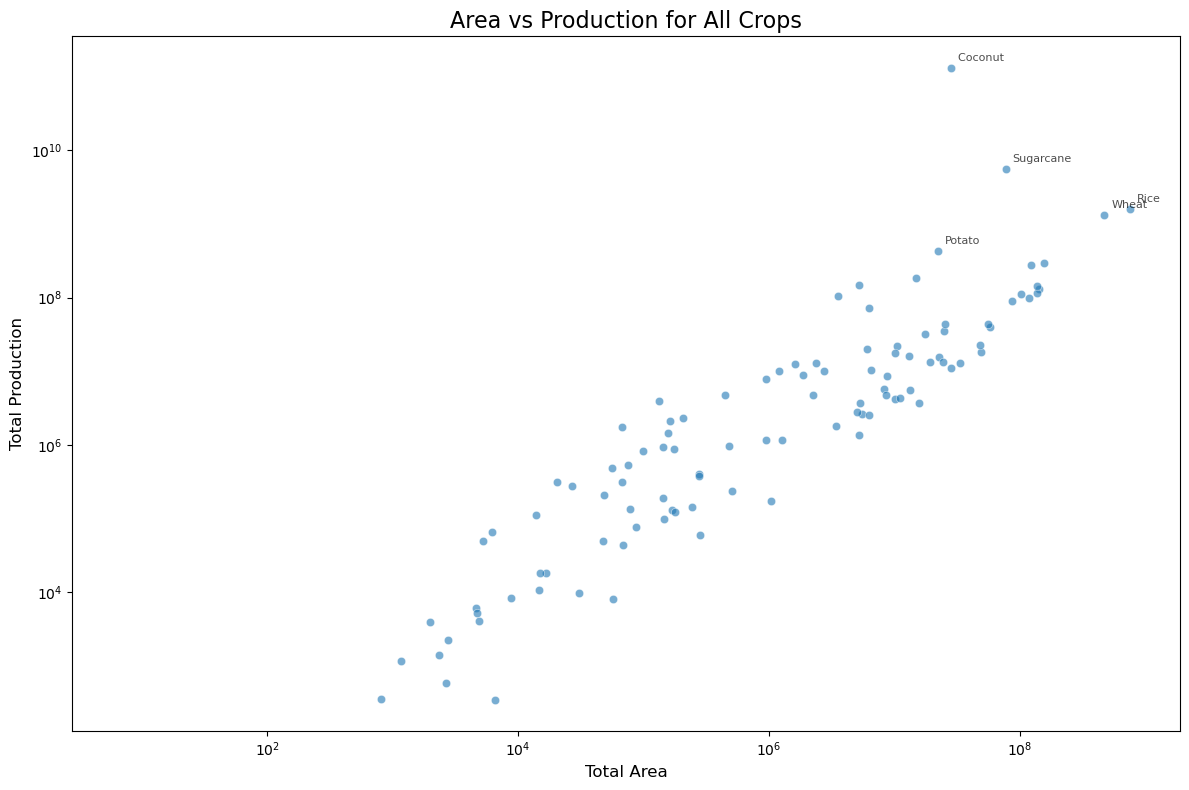

In [40]:
crop_data = data.groupby('Crop').agg({
    'Area': 'sum',
    'Production': 'sum'
}).reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(data=crop_data, x='Area', y='Production', alpha=0.6)
plt.title(f'Area vs Production for All Crops', fontsize=16)
plt.xlabel('Total Area', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.xscale('log')
plt.yscale('log')
for i, row in crop_data.nlargest(5, 'Production').iterrows():
    plt.annotate(row['Crop'], (row['Area'], row['Production']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
plt.tight_layout()
plt.show()

## There is a positive correlation between area and production for all crops.


### Production Efficiency of Crops, except Coconut since Coconut production is very high.


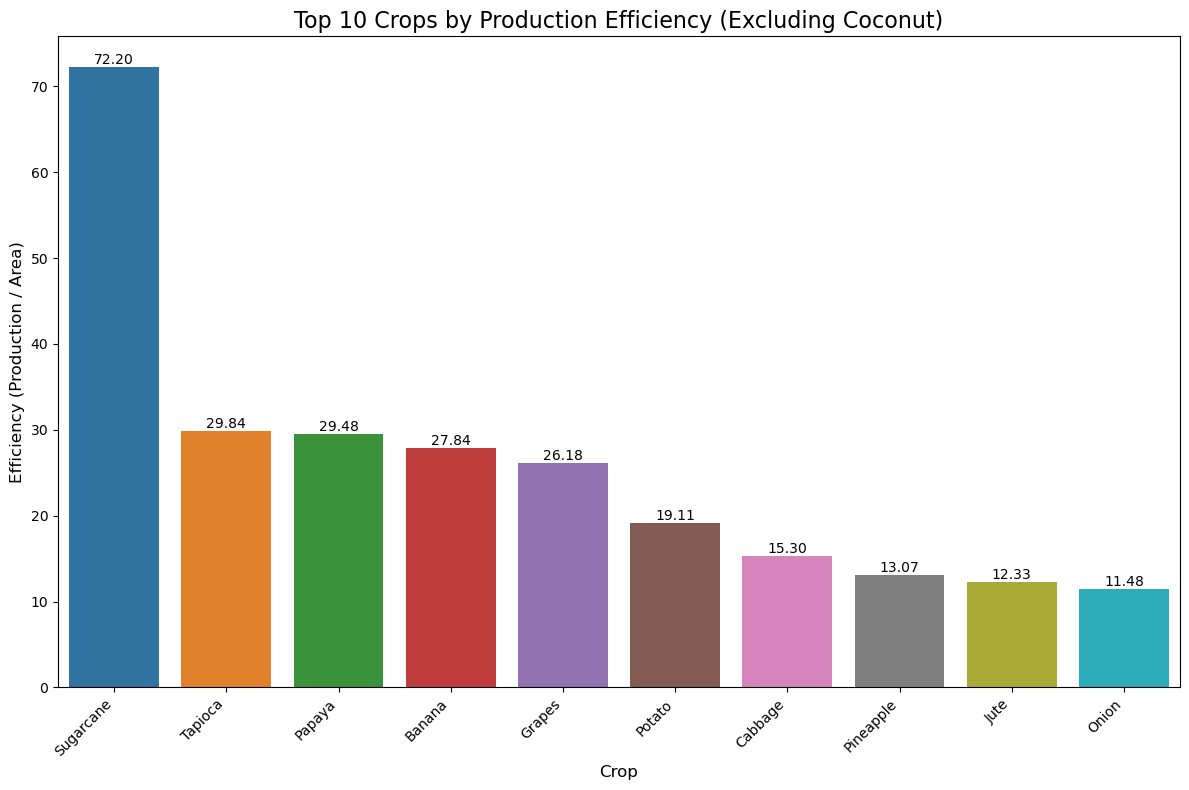

In [47]:
crop_data['Efficiency'] = crop_data['Production'] / crop_data['Area']
crop_data_no_coconut = crop_data[crop_data['Crop'] != 'Coconut ']
top_10_efficient = crop_data_no_coconut.nlargest(10, 'Efficiency')
plt.figure(figsize=(12, 8))
sns.barplot(x='Crop', y='Efficiency', data=top_10_efficient)
plt.title('Top 10 Crops by Production Efficiency (Excluding Coconut)', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Efficiency (Production / Area)', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_efficient['Efficiency']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Distribution of Top 10 Crops Across Seasons


<Figure size 1500x1000 with 0 Axes>

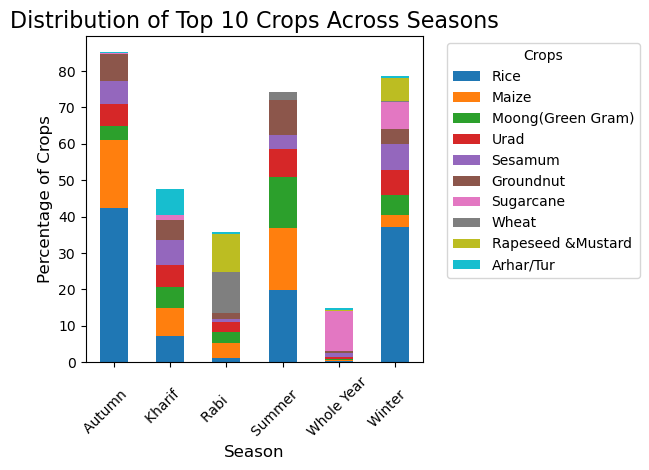

Percentage distribution of top 10 crops across seasons:
Crop              Rice      Maize  Moong(Green Gram)      Urad   Sesamum  \
Season                                                                     
Autumn       42.250960  18.872499           3.839159  5.879976  6.304304   
Kharif        7.168242   7.628894           5.812342  6.197955  6.766996   
Rabi          1.189783   4.082882           2.900563  2.794572  0.804634   
Summer       19.917795  16.993464          13.907419  7.802709  3.719426   
Whole Year    0.223366   0.418812           0.364715  0.301893  1.242474   
Winter       37.206999   3.235391           5.529878  6.751403  7.230109   

Crop         Groundnut  Sugarcane      Wheat  Rapeseed &Mustard  Arhar/Tur  
Season                                                                      
Autumn        7.658113   0.121237   0.000000           0.000000   0.363710  
Kharif        5.585142   1.207908   0.007295           0.114642   7.084866  
Rabi          1.665995   0.

In [48]:
season_crop_count = data.groupby(['Season', 'Crop']).size().unstack(fill_value=0)
season_crop_percentage = season_crop_count.div(season_crop_count.sum(axis=1), axis=0) * 100
N = 10
top_crops = season_crop_count.sum().nlargest(N).index
season_crop_percentage_top = season_crop_percentage[top_crops]
plt.figure(figsize=(15, 10))
season_crop_percentage_top.plot(kind='bar', stacked=True)
plt.title(f'Distribution of Top {N} Crops Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Percentage of Crops', fontsize=12)
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Percentage distribution of top {N} crops across seasons:")
print(season_crop_percentage_top)
print("\nMost common crop for each season:")
for season in season_crop_count.index:
    most_common = season_crop_count.loc[season].idxmax()
    percentage = season_crop_percentage.loc[season, most_common]
    print(f"{season}: {most_common} ({percentage:.2f}%)")

### Total Production by Season


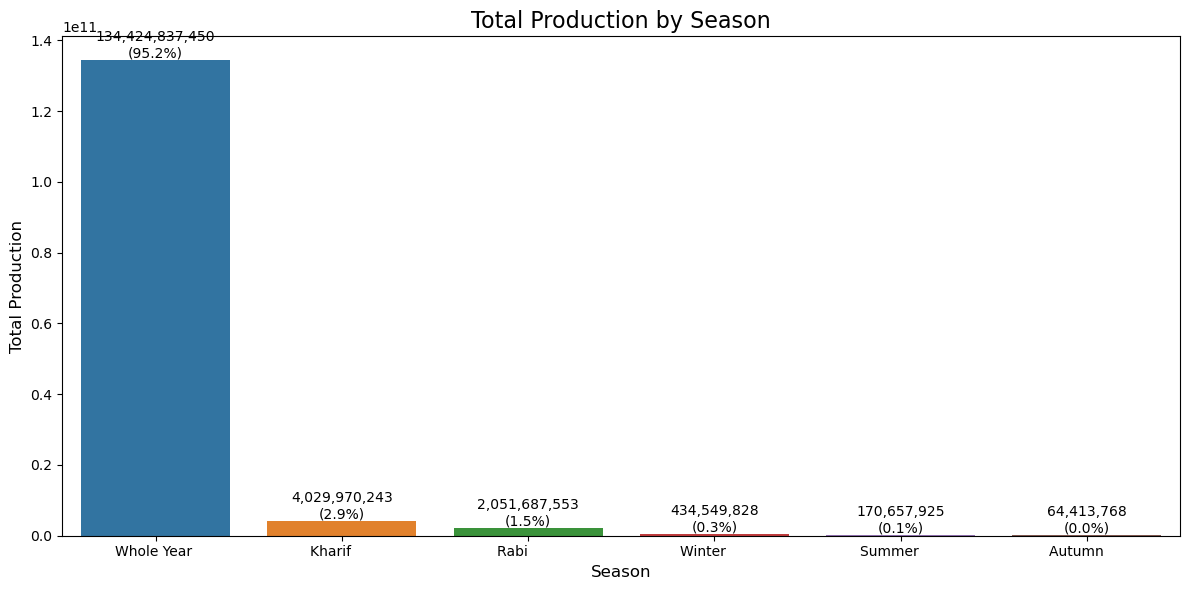

Production by Season:
Whole Year : 134,424,837,450 (95.2%)
Kharif     : 4,029,970,243 (2.9%)
Rabi       : 2,051,687,553 (1.5%)
Winter     : 434,549,828 (0.3%)
Summer     : 170,657,925 (0.1%)
Autumn     : 64,413,768 (0.0%)
Total Production: 141,176,116,767


In [51]:
season_production = data.groupby('Season')['Production'].sum().sort_values(ascending=False)
total_production = season_production.sum()
season_percentage = (season_production / total_production) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=season_production.index, y=season_production.values)
plt.title('Total Production by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
for i, v in enumerate(season_production.values):
    plt.text(i, v, f'{v:,.0f}\n({season_percentage[i]:.1f}%)', ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("Production by Season:")
for season, production in season_production.items():
    print(f"{season}: {production:,.0f} ({season_percentage[season]:.1f}%)")
print(f"Total Production: {total_production:,.0f}")